***Downloading the dataset***

In [0]:
!wget http://cb.lk/covid_19

--2020-06-05 09:23:17--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-06-05 09:23:17--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-06-05 09:23:18--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-06-05 09:23:18--  https://www.dropbox.com/s/raw/7

***UNZIP the DOWNLODED FILE***

In [0]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

***Importing the libraries for developing the Model***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

***Codel for constructing the CNN model***

In [0]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

***Generating training and the testing data by normalizing matrix values of all the images of training set and testing set and rescaling the images to (224,224) and batch size is 32***

In [0]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


***Fit the training data to the model and with (epochs = 10) and testing the model accuracy with the tesing set in each epoch***

In [0]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 90s 11s/step - loss: 1.0208 - accuracy: 0.5273 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 83s 10s/step - loss: 0.6307 - accuracy: 0.6562 - val_loss: 0.5408 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 80s 10s/step - loss: 0.3941 - accuracy: 0.8125 - val_loss: 0.2411 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 81s 10s/step - loss: 0.5435 - accuracy: 0.7812 - val_loss: 0.3912 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 81s 10s/step - loss: 0.2965 - accuracy: 0.8750 - val_loss: 0.1321 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 81s 10s/step - loss: 0.3107 - accuracy: 0.8945 - val_loss: 0.2844 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 86s 11s/step - loss: 0.1973 - accuracy: 0.9180 - val_loss: 0.0482 - val_accuracy: 0.9833
Epoch 8/10
8/8 [===========

In [0]:
model.save("Covid_model_.h5")

In [0]:
import os


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []


***Models output for the Testing set and the confusion matrix ***

In [0]:
import os

dir_path = './CovidDataset/Val/Normal/.ipynb_checkpoints'

try:
    os.rmdir(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

Error: ./CovidDataset/Val/Normal/.ipynb_checkpoints : No such file or directory


In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
import os

dir_path = './CovidDataset/Val/Covid/.ipynb_checkpoints'

try:
    os.rmdir(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

Error: ./CovidDataset/Val/Covid/.ipynb_checkpoints : No such file or directory


In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)


In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual, y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


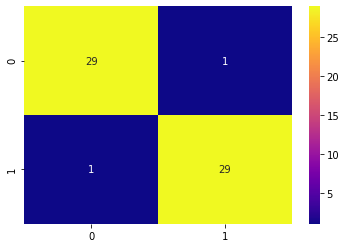

In [0]:
import seaborn as sns
sns.heatmap(cm, cmap='plasma', annot=True)

***Model Summary***

In [0]:
import tensorflow as tf;
s_model = tf.keras.models.load_model('/content/Covid_model_.h5')

s_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

***Giving the user input by selecting the images from the local system to the model.***


In [0]:
from google.colab import files
upload = files.upload()

Saving testing image 1.jpg to testing image 1.jpg


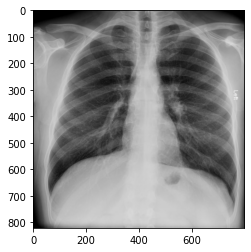

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob('/content/testing image 1.jpg'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()

plt.imshow(normal_images[0], cmap='gray') 





***The models prediction for the selected image***

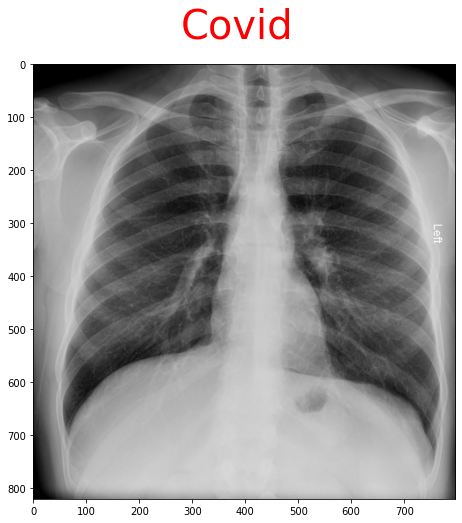

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
y_test_=[]
oo=[]
imgx = image.load_img('/content/testing image 1.jpg', target_size=(224,224))
oo.append(i)
img = image.img_to_array(imgx)
img = np.expand_dims(img, axis=0)
n=model.predict_classes(img)
y_test_.append(n[0,0])
for n, i in enumerate(y_test_):
   if i == 0:
      y_test_[n] = 'Covid'
   elif i == 1:
      y_test_[n]='Normal'


images = []
for img_path in glob.glob('/content/testing image 1.jpg'):
    images.append(mpimg.imread(img_path))

fig = plt.figure(figsize=(8,8))
fig.suptitle(y_test_[0],color='red',size=40)
plt.imshow(images[0], cmap='gray') 

In [0]:
from google.colab import files
upload = files.upload()

Saving testing image 3.jpeg to testing image 3.jpeg


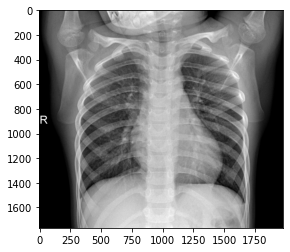

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob('/content/testing image 2.jpeg'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()

plt.imshow(normal_images[0], cmap='gray') 





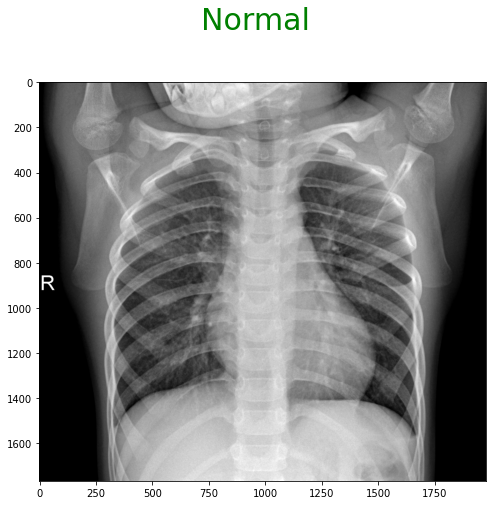

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
y_test_1=[]
oo=[]
imgx = image.load_img('/content/testing image 2.jpeg', target_size=(224,224))
oo.append(i)
img = image.img_to_array(imgx)
img = np.expand_dims(img, axis=0)
n=model.predict_classes(img)
y_test_1.append(n[0,0])
for n, i in enumerate(y_test_1):
   if i == 0:
      y_test_1[n] = 'Covid'
   elif i == 1:
      y_test_1[n]='Normal'


images_1 = []
for img_path in glob.glob('/content/testing image 2.jpeg'):
    images_1.append(mpimg.imread(img_path))
fig = plt.figure(figsize=(8,8))
fig.suptitle(y_test_1[0], color='green', size=30)
plt.imshow(images_1[0], cmap='gray') 

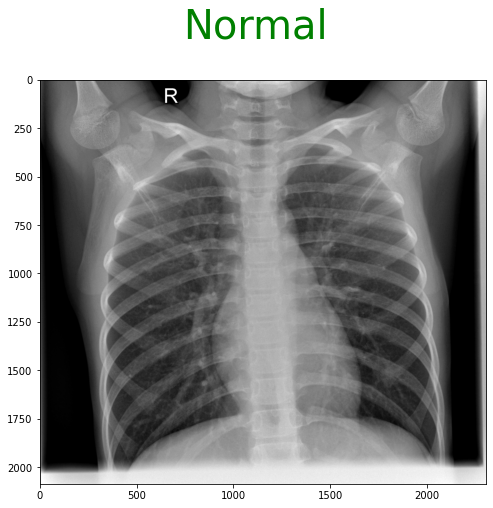

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
y_test_1=[]
oo=[]
imgx = image.load_img('/content/test image 4.jpeg', target_size=(224,224))
oo.append(i)
img = image.img_to_array(imgx)
img = np.expand_dims(img, axis=0)
n=model.predict_classes(img)
y_test_1.append(n[0,0])
for n, i in enumerate(y_test_1):
   if i == 0:
      y_test_1[n] = 'Covid'
   elif i == 1:
      y_test_1[n]='Normal'


images_1 = []
for img_path in glob.glob('/content/test image 4.jpeg'):
    images_1.append(mpimg.imread(img_path))
fig = plt.figure(figsize=(8,8))
fig.suptitle(y_test_1[0], color='green', size=40)
plt.imshow(images_1[0], cmap='gray') 

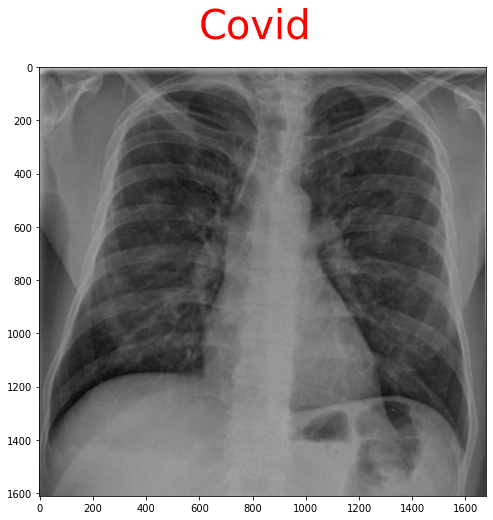

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
y_test_1=[]
oo=[]
imgx = image.load_img('/content/testing image 3.jpeg', target_size=(224,224))
oo.append(i)
img = image.img_to_array(imgx)
img = np.expand_dims(img, axis=0)
n=model.predict_classes(img)
y_test_1.append(n[0,0])
for n, i in enumerate(y_test_1):
   if i == 0:
      y_test_1[n] = 'Covid'
   elif i == 1:
      y_test_1[n]='Normal'


images_1 = []
for img_path in glob.glob('/content/testing image 3.jpeg'):
    images_1.append(mpimg.imread(img_path))
fig = plt.figure(figsize=(8,8))
fig.suptitle(y_test_1[0], color='Red', size=40)
plt.imshow(images_1[0], cmap='gray') 